### Time series forecasting of the pre-event Air RPM (Revenue Passenger Miles) series using Moving average and Holt Exponential smoothing methods.

Jeet Patel | N015101518 | Github - https://github.com/jeeeet25/Holt_Exponential_Smoothing-and-Moving-Average 

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('air_miles.csv')


In [31]:
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')

pre_event_data = data[data['Month'] < pd.to_datetime('2001-09-01')]

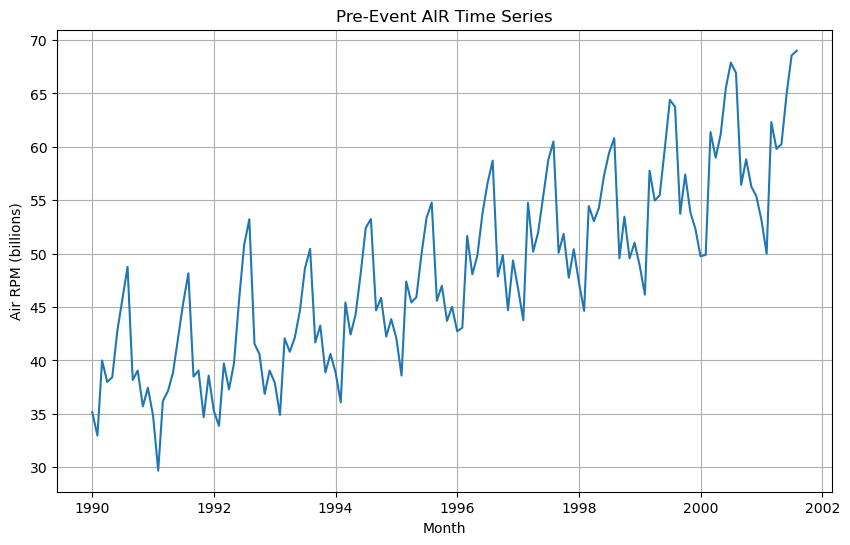

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(pre_event_data['Month'], pre_event_data['Air RPM (billions)'])
plt.xlabel('Month')
plt.ylabel('Air RPM (billions)')
plt.title('Pre-Event AIR Time Series')
plt.grid(True)
plt.show()

Since the time plot shows the presence of trend, seasonality, and random fluctuations in the Air RPM series, it becomes evident that the data demonstrates a combination of sustained long-term changes (trend) and repetitive short-term fluctuations (seasonality). we can proceed with analyzing and selecting the most appropriate smoothing method.

Considering the characteristics observed in the plot, Moving average with what window width range of (2-4) OR the Holt Exponential Smoothing method would likely be the most suitable choice for forecasting this time series.

In [42]:
summary_stats = pre_event_data['Air RPM (billions)'].describe()

print(summary_stats)

count    140.000000
mean      48.213286
std        8.691648
min       29.670000
25%       41.650000
50%       47.960000
75%       53.977500
max       69.000000
Name: Air RPM (billions), dtype: float64


In [60]:
# Moving Average (with window width)
window_width = 2
pre_event_data['Moving_Average'] = pre_event_data['Air RPM (billions)'].rolling(window=window_width).mean()

#Holt Exponential Smoothing (assuming alpha and beta values)
alpha = 0.4
beta = 0.1
pre_event_data['Holt_Exponential_Smoothing'] = pre_event_data['Air RPM (billions)'].ewm(alpha=alpha, adjust=False).mean()

print(pre_event_data)

         Month  Air RPM (billions)   Air RPM  Moving_Average  \
0   1990-01-01               35.15  35153577             NaN   
1   1990-02-01               32.97  32965187          34.060   
2   1990-03-01               39.99  39993913          36.480   
3   1990-04-01               37.98  37981886          38.985   
4   1990-05-01               38.42  38419672          38.200   
..         ...                 ...       ...             ...   
135 2001-04-01               59.80  59801562          61.060   
136 2001-05-01               60.25  60246477          60.025   
137 2001-06-01               64.99  64987625          62.620   
138 2001-07-01               68.57  68573410          66.780   
139 2001-08-01               69.00  69003617          68.785   

     Simple_Exponential_Smoothing  Holt_Exponential_Smoothing  
0                       35.150000                   35.150000  
1                       34.496000                   34.278000  
2                       36.144200      

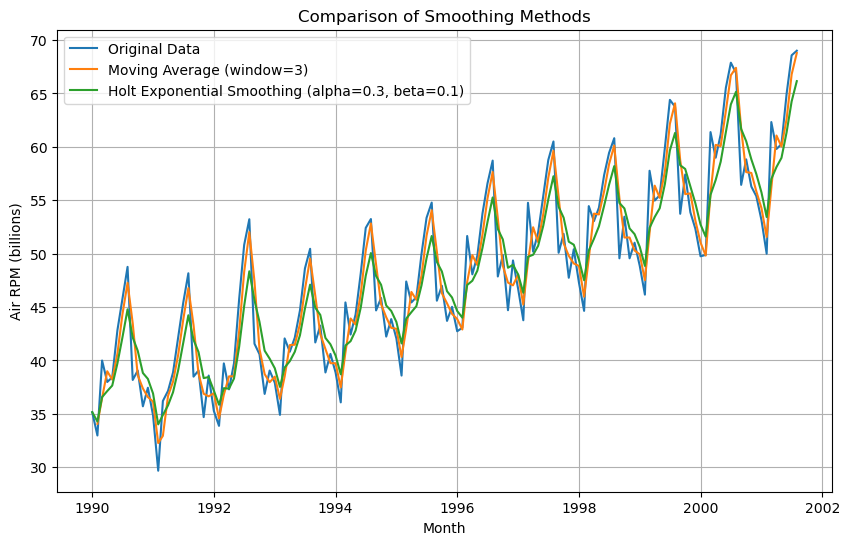

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(pre_event_data['Month'], pre_event_data['Air RPM (billions)'], label='Original Data')
plt.plot(pre_event_data['Month'], pre_event_data['Moving_Average'], label='Moving Average (window=3)')
plt.plot(pre_event_data['Month'], pre_event_data['Holt_Exponential_Smoothing'], label='Holt Exponential Smoothing (alpha=0.3, beta=0.1)')
plt.xlabel('Month')
plt.ylabel('Air RPM (billions)')
plt.title('Comparison of Smoothing Methods')
plt.legend()
plt.grid(True)
plt.show()

The Moving Average smoothing method with a window width of 2 provides the best fit for forecasting the pre-event Air RPM (billions) series. 